Titanic Survival Analysis

Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading DataFrame

In [ ]:
df=pd.read_csv("Titanic.csv")
print(df)

Solving Null values & Duplicated

In [ ]:
print(df.isna().sum())


In [ ]:
print(df.duplicated().sum())

In [57]:
df.drop('Cabin',axis=1,inplace=True)
print("Cabin Column Deleted !")

Cabin Column Deleted !


In [58]:
df.dropna(subset=['Embarked'],inplace=True)
print("In Embarked Rows deleted Were is null value")

In Embarked Rows deleted Were is null value


In [ ]:
df.reset_index(drop=True)
print(df)

Filling Null With Mean

In [ ]:
df.fillna(df["Age"].mean(),inplace=True)
print("Age filled By Mean")
df.isna().sum()

Setting up Data Types

In [ ]:
df.dtypes

In [ ]:
df["Age"]=df["Age"].astype(int)
df.dtypes

Data Visualization 

Pie Chart

In [63]:
survived=df["Survived"].value_counts()
print(survived)
labels=["Not Survived",'Survived']
colors=['lightpink','lightblue']

Survived
0    549
1    340
Name: count, dtype: int64


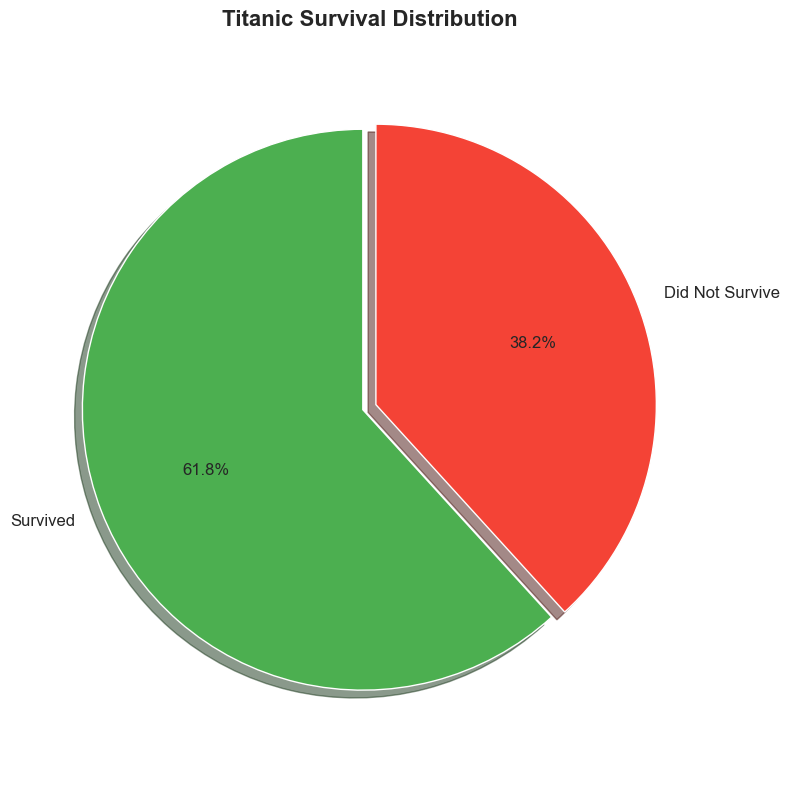

'\nsns.set_style("whitegrid")\nplt.figure(figsize=(10,8))\nplt.pie(survived,labels=labels,autopct="%0.2f%%",startangle=90,colors=colors)\nplt.title("Survived on Titanic")\nplt.tight_layout()\nplt.show()'

In [64]:
labels = ["Survived", "Did Not Survive"]
colors = ["#4CAF50","#F44336"] 
explode = (0.05, 0)  
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(
    survived,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={"fontsize": 12}
)
plt.title("Titanic Survival Distribution", fontsize=16, fontweight="bold")
plt.axis("equal")
plt.tight_layout()
plt.show()
'''
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.pie(survived,labels=labels,autopct="%0.2f%%",startangle=90,colors=colors)
plt.title("Survived on Titanic")
plt.tight_layout()
plt.show()'''

Count of Male & Female in Ship 

In [65]:
gender=df["Sex"].value_counts()
print(gender)

Sex
male      577
female    312
Name: count, dtype: int64


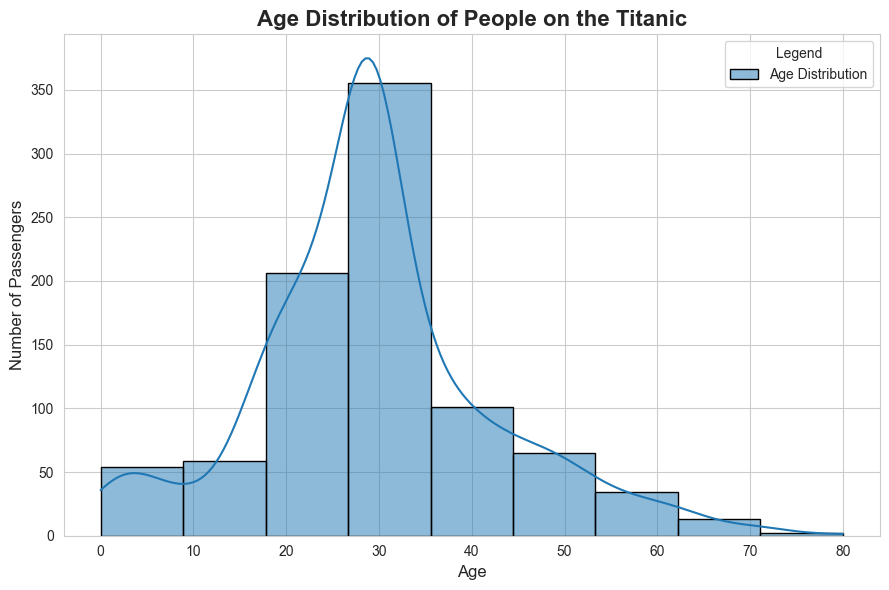

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(9, 6))
sns.histplot(df["Age"],bins=9,kde=True,color="#1f77b4",edgecolor="black",label="Age Distribution")
plt.title("Age Distribution of People on the Titanic", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.legend(title="Legend")
plt.tight_layout()
plt.show()


Age Wise survival record

In [67]:

df_age = df.dropna(subset=["Age"])
bins = [0, 12, 18, 35, 60, 100]
labels = ["Children", "Teenagers", "Adults", "Middle Age", "Seniors"]
df_age["AgeGroup"] = pd.cut(df_age["Age"], bins=bins, labels=labels)

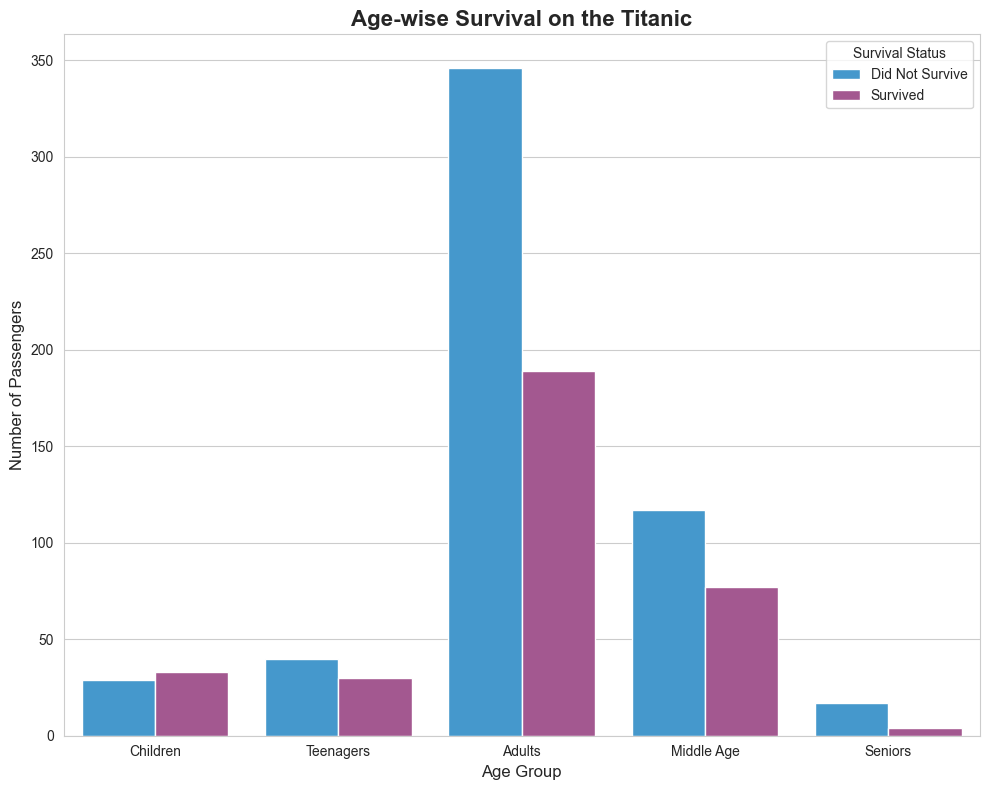

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.countplot(data=df_age,x="AgeGroup",hue="Survived",palette=["#2F9DE2", "#AF4C96"])
plt.title("Age-wise Survival on the Titanic", fontsize=16, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.tight_layout()
plt.show()


Gender Wise survival Rate

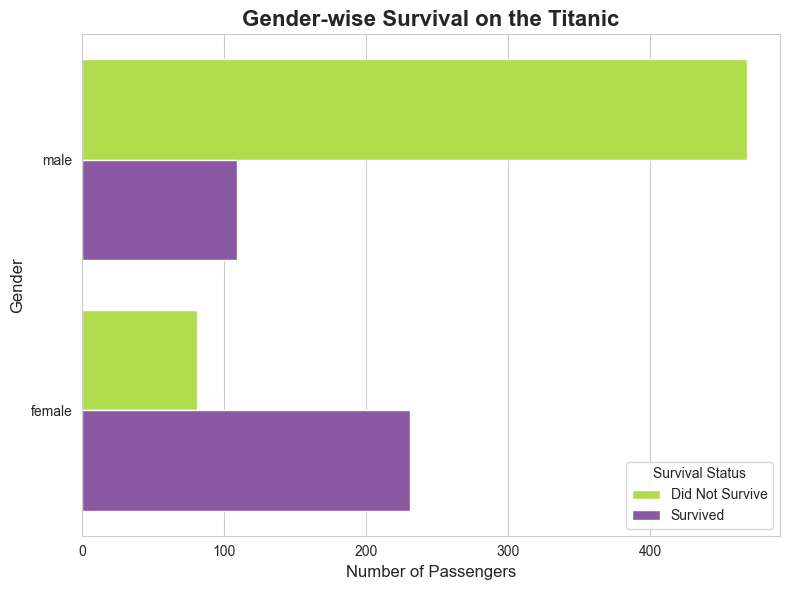

In [69]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df,y="Sex",hue="Survived",palette=["#BBF436", "#904CAF"])
plt.title("Gender-wise Survival on the Titanic", fontsize=16, fontweight="bold")
plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.tight_layout()
plt.show()


Embarked(Class) Wise Survival Rate

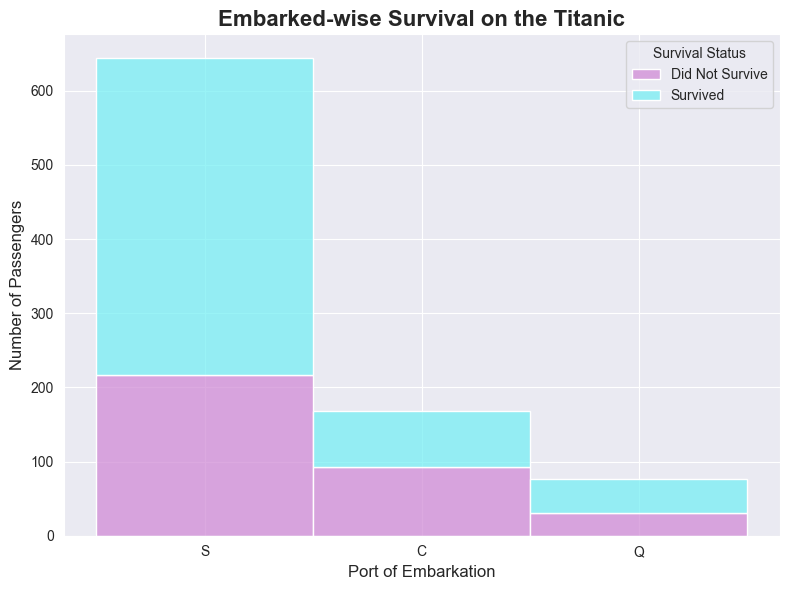

In [70]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x="Embarked",hue="Survived",discrete=True,multiple="stack",palette=["#77EFF4", "#D18CD6"])
plt.title("Embarked-wise Survival on the Titanic", fontsize=16, fontweight="bold")
plt.xlabel("Port of Embarkation", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.tight_layout()
plt.show()


In [71]:
df["Fare"]=df["Fare"].round()
print(df.dtypes)
df["Fare"]=df["Fare"].astype(int)
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object
PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Embarked       object
dtype: object


Fare VS Age Wise Survival

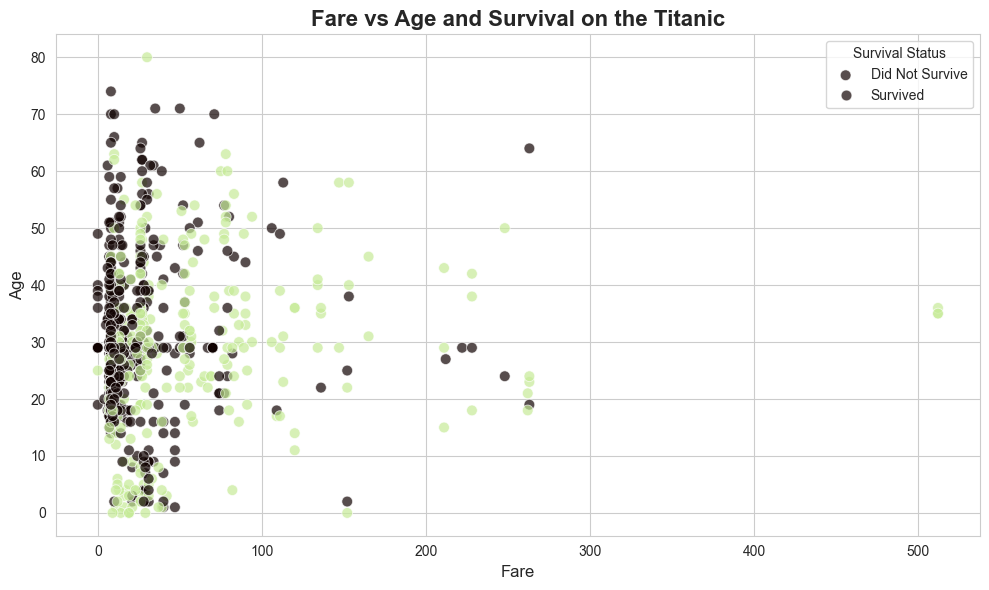

In [72]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x="Fare",y="Age",hue="Survived",palette=["#100201", "#C6EB98"],alpha=0.7,s=60)
plt.title("Fare vs Age and Survival on the Titanic", fontsize=16, fontweight="bold")
plt.xlabel("Fare", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.tight_layout()
plt.show()

Aggregate data: average fare per class

In [73]:
avg_fare = df.groupby("Pclass")["Fare"].mean().reset_index()

Fare Bar Chart

C:\Users\IS POINT\AppData\Local\Temp\ipykernel_9516\4212486701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass",y="Fare",data=avg_fare,palette="deep")


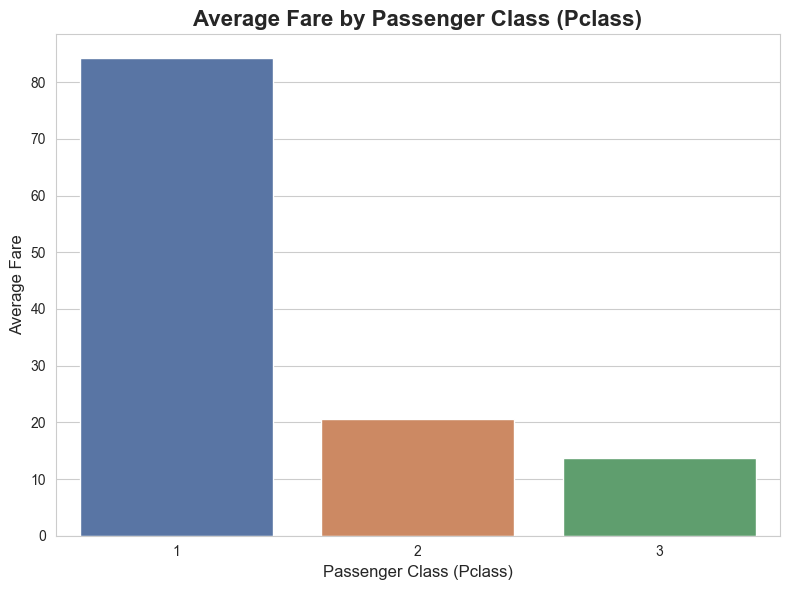

In [74]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="Pclass",y="Fare",data=avg_fare,palette="deep")
plt.title("Average Fare by Passenger Class (Pclass)", fontsize=16, fontweight="bold")
plt.xlabel("Passenger Class (Pclass)", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.tight_layout()
plt.show()


P Class Wise Survival 

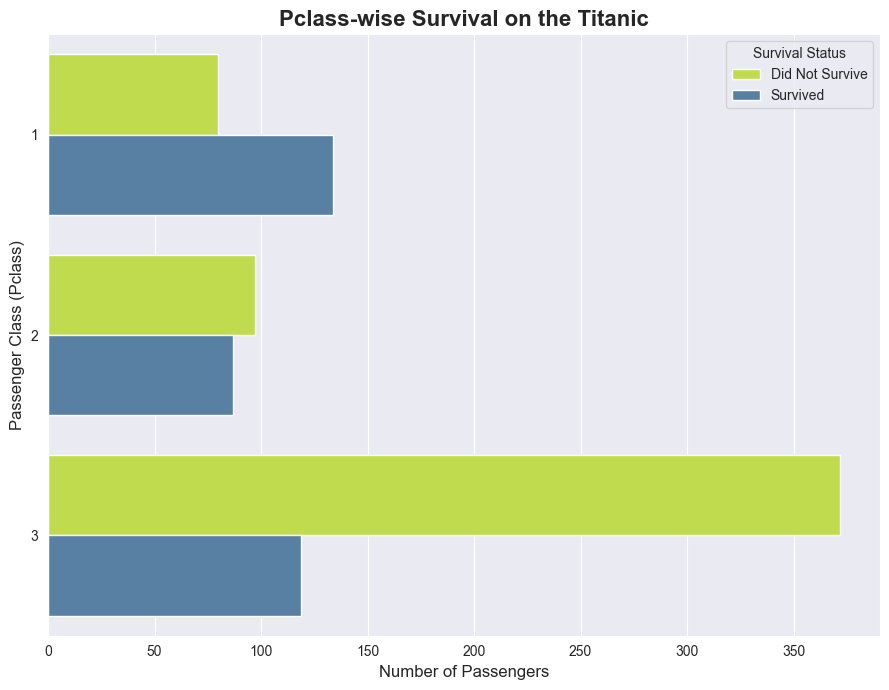

In [75]:
sns.set_style("darkgrid")
plt.figure(figsize=(9, 7))
sns.countplot(data=df,y="Pclass",hue="Survived",palette=["#CEF436", "#4C81AF"])
plt.title("Pclass-wise Survival on the Titanic", fontsize=16, fontweight="bold")
plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Passenger Class (Pclass)", fontsize=12)
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.tight_layout()
plt.show()


#Correlation Heatmap of Titanic Features

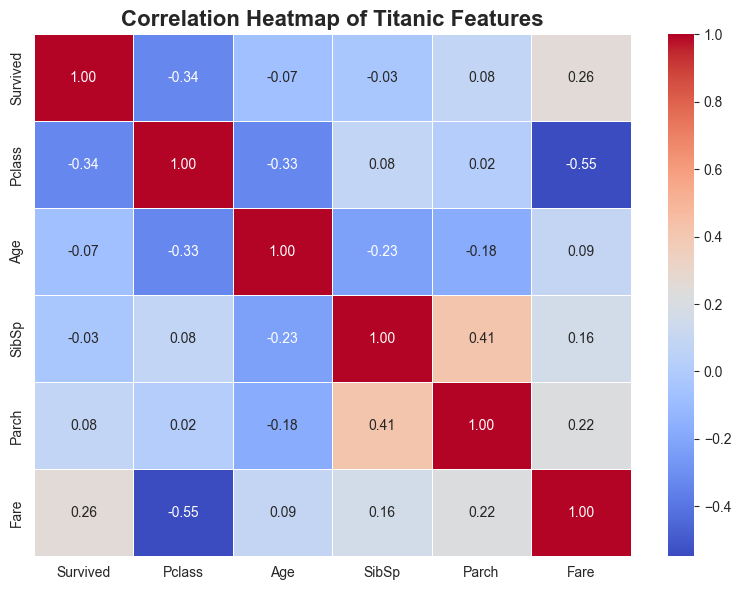

In [76]:
sns.set_style("whitegrid")
corr = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr,annot=True,cmap="coolwarm", linewidths=0.5,fmt=".2f"
)
plt.title("Correlation Heatmap of Titanic Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


Number of passengers by parch

C:\Users\IS POINT\AppData\Local\Temp\ipykernel_9516\1354715507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Parch",palette='dark')


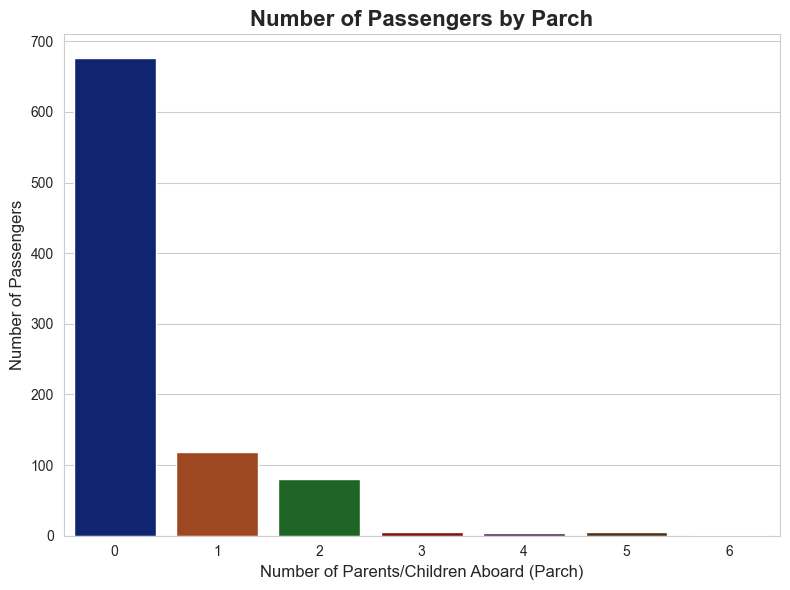

In [78]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="Parch",palette='dark')
plt.title("Number of Passengers by Parch", fontsize=16, fontweight="bold")
plt.xlabel("Number of Parents/Children Aboard (Parch)", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.tight_layout()
plt.show()
